In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [25]:
import yfinance as yf
stock_symbol = 'TSLA'
df = yf.download(tickers=stock_symbol,period='1y',interval='1d')
df = df.reset_index()
df.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-04-22,1014.909973,1034.849976,994.000000,1005.049988,1005.049988,23181600
249,2022-04-25,978.969971,1008.619995,975.299988,998.020020,998.020020,22780400
250,2022-04-26,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900
251,2022-04-27,898.580017,918.000000,877.359985,881.510010,881.510010,25652100
252,2022-04-28,899.979980,900.000000,821.700012,877.510010,877.510010,41235400


In [30]:
def pct_change(x,period=1):
    x = np.array(x)
    return ((x[period:] - x[:-period]) / x[:-period])

In [31]:
number_simulation = 10
predict_day = 30
returns = df.Close.pct_change()
volatility = returns.std()
results = pd.DataFrame()

for i in tqdm(range(number_simulation)):
    prices = []
    ran_arr = []
    prices.append(df.Close.iloc[-1])
    for d in range(predict_day):
        v = np.random.normal(0, volatility)
        ran_arr.append(v)
        prices.append(prices[d] * (1 + v))
    results[i] = pd.Series(prices).values

100%|██████████| 10/10 [00:00<00:00, 1671.24it/s]


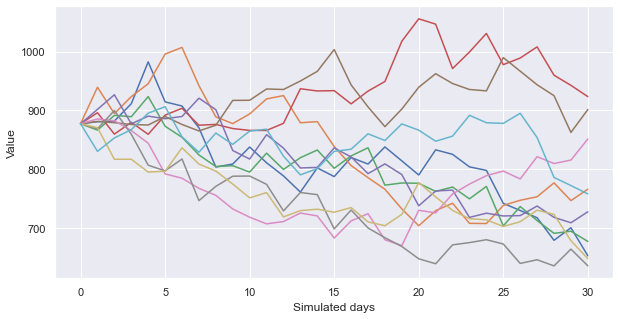

In [32]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated days')
plt.show()

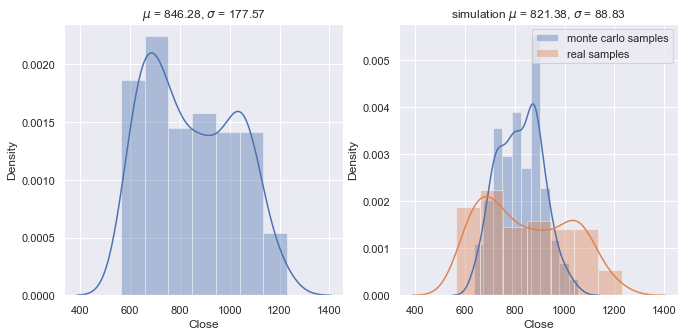

In [33]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,2)
sns.distplot(df.Close,norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='real samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()